# Univariate Linear Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sys import stdout

## Read the dataset

In [2]:
data = pd.read_csv("./ex1data1.txt", delimiter=',', header=0)
data

,Population of City (in 10K),Profit (in 10K $)
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
X = data["Population of City (in 10K)"].values
y = data["Profit (in 10K $)"].values

In [4]:
print(X.shape)
print(y.shape)

(97,)
(97,)


In [5]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(97, 1)
(97, 1)


## Scatter Plot data

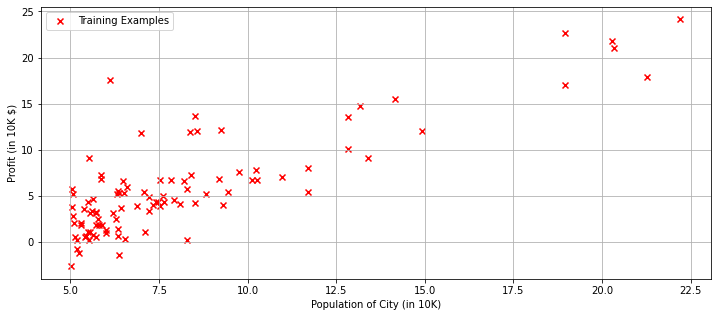

In [6]:
plt.figure(figsize=(12,5)) #figsize=(cols,rows)
plt.scatter(X,y,marker='x', color= 'r', label = "Training Examples")
plt.xlabel("Population of City (in 10K)")
plt.ylabel("Profit (in 10K $)")
plt.grid()
plt.legend()
plt.show()

## Hypothesis function

$$\large h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$$
where $x^{(i)}$ represents the i-th training example

$$\large h_{\theta}(X) = X\theta$$
$$ X : m \times n$$
$$ \theta : n \times 1$$
$$ h_{\theta}(X) : m \times 1$$

where $X$ is called **Design Matrix**

$$ X = \begin{bmatrix}
 1 & x_{1}^{(0)} \\
  1 & x_{1}^{(1)} \\
  \vdots & \vdots \\
  1 & x_{1}^{(m-1)}
 \end{bmatrix}$$

$$\theta =  \begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix}$$

## Cost Function

### Non Vectorized Cost Function
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 $$
### Vectorized Cost Function
$$J(\theta) = \frac{1}{2m} (X\theta -y)^T(X\theta -y)$$

## Add the intercept term

In [7]:
X = np.c_[np.ones(X.shape[0]),X]

## Cost Function Implementation

In [8]:
def computeCostLoopBase(X, y, theta = np.zeros((X.shape[1],1))):
    m = X.shape[0]
    J = 0

    elapsed_time = -time.time()

    for i in range(m):
        h = 0
        for k in range(X.shape[1]):
            h += (theta[k]*X[i][k])
        J += ( h - y[i]) ** 2 # individual loss of i-th element

    J /= 2*m

    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)

    return J, elapsed_time_ms

In [9]:
J_lb,etime_lb = computeCostLoopBase(X,y)
print(J_lb)
print(etime_lb)

[32.07273388]
0.844


In [10]:
def computeCostVectorized(X, y, theta = np.zeros((X.shape[1],1))):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()
    J = 1/(2*m) * ((X.dot(theta) - y).T.dot(X.dot(theta) - y))
    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J,elapsed_time_ms

In [11]:
J_v, etime_v = computeCostVectorized(X,y)
print(J_v)
print(etime_v)

[[32.07273388]]
0.056


In [12]:
def computeCostNumpy(X, y, theta = np.zeros((X.shape[1],1))):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()

    h = X.dot(theta)
    J = np.sum(np.square(h-y))/(2*m)

    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J,elapsed_time_ms

In [13]:
J_np, etime_np = computeCostNumpy(X,y)
print(J_np)
print(etime_np)

32.072733877455676
0.06


## Benchmark

In [14]:
n_iter = 1000
etime_loop_counter = 0
etime_vector_counter = 0
etime_np_counter = 0

for i in range(n_iter):
    _, etime_loop = computeCostLoopBase(X,y)
    _, etime_vec = computeCostVectorized(X,y)
    _, etime_np = computeCostNumpy(X,y)
    etime_loop_counter += etime_loop
    etime_vector_counter += etime_vec
    etime_np_counter += etime_np
print("Benchmark over {} iterations".format(n_iter))
etime_loop_avg = np.round(etime_loop_counter / n_iter, 3)
etime_vector_avg = np.round(etime_vector_counter/ n_iter, 3)
etime_np_avg = np.round(etime_np_counter/n_iter,3)
print("Results\nLoop: {}ms\nVector: {}ms\nNP: {}ms".format(etime_loop_avg,etime_vector_avg,etime_np_avg))

Benchmark over 1000 iterations
Results
Loop: 0.842ms
Vector: 0.009ms
NP: 0.012ms


## Plot $J(\theta_1)$ with $\theta_0 = 0$

In [15]:
n_theta_samples = 10
sample_theta = np.linspace(-10,10,num=n_theta_samples) #theta_1, theta_0 = 0

costs = np.zeros((n_theta_samples,1))
hypoteses = []

for i in range(n_theta_samples):
    theta = np.array([0,sample_theta[i]]).reshape(-1,1)

    hypoteses.append(X.dot(theta))
    costs[i],_ =computeCostVectorized(X,y, theta)

costs

array([[4755.55837244],
       [3002.40403331],
       [1651.24447355],
       [ 702.07969315],
       [ 154.90969213],
       [   9.73447047],
       [ 266.55402818],
       [ 925.36836526],
       [1986.17748171],
       [3448.98137752]])

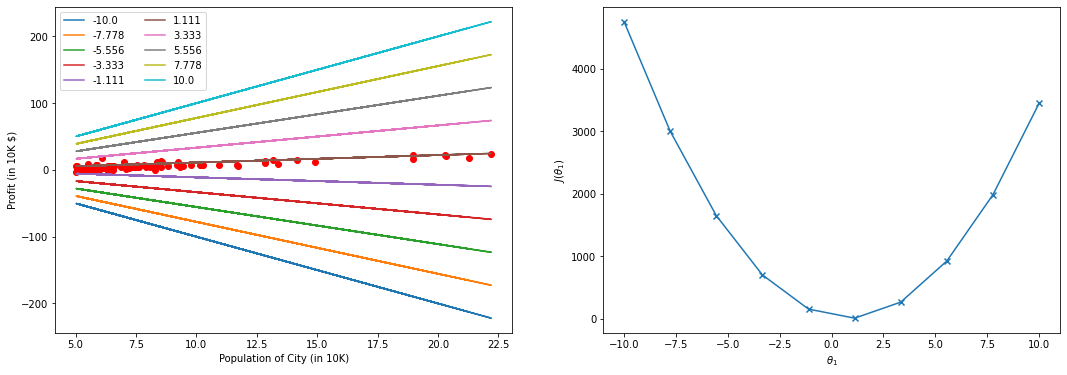

In [16]:
fig = plt.figure(figsize= (18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X[:,1],y, marker='o', c = 'r')
for i in range(n_theta_samples):
    ax1.plot(X[:,1],hypoteses[i], label= str(np.round(sample_theta[i],3)))
ax1.set_xlabel("Population of City (in 10K)")
ax1.set_ylabel("Profit (in 10K $)")
ax1.legend(loc = 'upper left', ncol=2)

ax2.scatter(sample_theta,costs, marker='x')
ax2.plot(sample_theta,costs)
ax2.set_xlabel(r"$\theta_1$")
ax2.set_ylabel(r"$J(\theta_1)$")

plt.show()

## Batch Gradient Descent (Loop-Based)
$$\large h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$$
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

$$\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \frac{1}{m}\sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)})$$
$$\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} = \frac{1}{m}\sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}$$

Repeat {
$$\theta_0 := \theta_0 - \frac{\alpha}{m} \sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)})$$
$$\theta_1 := \theta_1 - \frac{\alpha}{m} \sum_{i=0}^{m-1}(h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)} $$
}


In [17]:
def gradientDescentLoop2(X, y, theta = np.zeros((X.shape[1],1)), alpha = 0.001, n_iters = 1000):
    m = X.shape[0]
    n = X.shape[1]
    J = 0
    for iter in range(n_iters):
        prev = J
        J,_= computeCostLoopBase(X,y,theta)
        stdout.write("\rIteration {}/{} Cost: {} Loss: {}".format(iter,n_iters,J, prev-J))
        partial_sum = np.zeros((n_theta_samples,1))
        for i in range(m):
            h = 0
            for j in range(n):
                h += theta[j]*X[i][j]
            for j in range(n):
                partial_sum[j] += (h - y[i])*X[i][j]
        for j in range(n):
            theta[j] = theta[j] - ((alpha/m)* partial_sum[j])
    stdout.write("\n")
    return theta,J

In [18]:
def gradientDescentLoop(X, y, theta = np.zeros((X.shape[1],1)), alpha = 0.001, n_iters = 1000, early = False, epsilon = 0.000001):
    m = X.shape[0]
    n = X.shape[1]
    J = np.zeros((n_iters,1))
    theta_gd = np.copy(theta)
    elapsed_time = -time.time()
    for iter in range(n_iters):
        prev = J[iter -1]
        J[iter],_= computeCostLoopBase(X,y,theta_gd)
        #stdout.write("\rIteration {}/{} Cost: {} Loss: {}".format(iter,n_iters,J[iter], prev-J[iter]))

        h = np.zeros((m,1))
        partial_sum = np.zeros((n,1))
        for i in range(m):
            for j in range(n):
                h[i] += theta_gd[j]*X[i][j]
            for j in range(n):
                partial_sum[j] += (h[i] - y[i])*X[i][j]
        for j in range(n):
            theta_gd[j] = theta_gd[j] - ((alpha/m)* partial_sum[j])

        if early:
            if (iter != 0) and (J[iter -1 ] - J[iter] < epsilon):
                elapsed_time += time.time()
                elapsed_time = np.round(elapsed_time*1000,3)
                #stdout.write("\n")
                return theta_gd,J[J!=0],elapsed_time

    elapsed_time += time.time()
    elapsed_time = np.round(elapsed_time*1000,3)
    #stdout.write("\n")
    return theta_gd,J,elapsed_time

In [24]:
theta,J_history_loop,etime_gd_loop = gradientDescentLoop(X,y,alpha=0.003, n_iters=20000)
print("Time: {}ms".format(etime_gd_loop))
print("Theta0: {} Theta1: {}".format(theta[0],theta[1]))
print("Cost: {}".format(J_history_loop))

Time: 34914.404ms
Theta0: [-3.89570127] Theta1: [1.19302565]
Cost: [[32.07273388]
 [20.75843135]
 [14.33684248]
 ...
 [ 4.47697138]
 [ 4.47697138]
 [ 4.47697138]]


## Scikit learn Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
theta_sklearn = np.array([reg.intercept_[0],reg.coef_[0][1]]).reshape(-1,1)
print("Theta0: {} Theta1{} ".format(reg.coef_,reg.intercept_))

Theta0: [[0.         1.19303364]] Theta1[-3.89578088] 


Text(0, 0.5, '$J(\\theta)$')

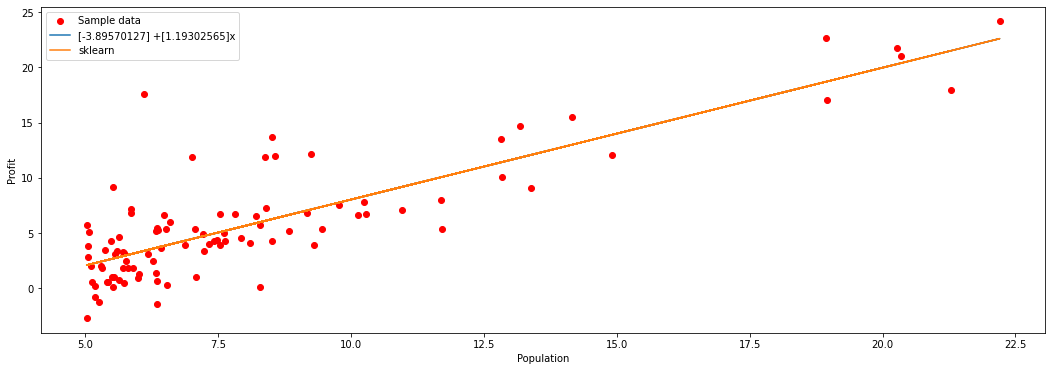

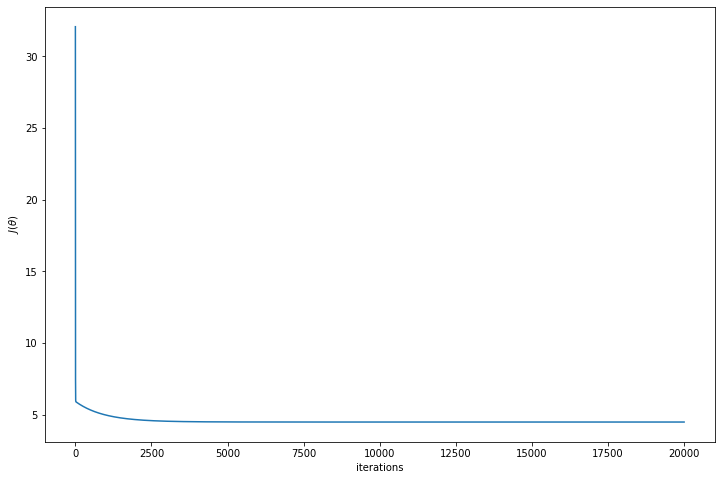

In [30]:
fig = plt.figure(figsize= (18,6))
plt.scatter(X[:,1],y, marker='o', c = 'r', label="Sample data")
#axes = plt.gca()
#x_vals = np.array(axes.get_xlim())
#y_vals = theta[0] + theta[1] * x_vals
#plt.plot(x_vals, y_vals, '--')
plt.plot(X[:,1], X.dot(theta), label='{} +{}x'.format(theta[0],theta[1]))
plt.plot(X[:,1], X.dot(theta_sklearn), label='sklearn')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()

plt.figure(figsize=(12,8))
plt.plot(np.arange(J_history_loop.shape[0])+1,J_history_loop)
plt.xlabel("iterations")
plt.ylabel(r"$J(\theta)$")

# Contour Plots

In [35]:
B0 = np.linspace(-80,80,50)
B1 = np.linspace(-10,10,50)

xx, yy = np.meshgrid(B0,B1, indexing='xy')

Z = np.zeros((B0.shape[0],B1.shape[0]))
for (i,j), v in np.ndenumerate(Z):
    Z[i][j],_ =computeCostVectorized(X,y,theta = [[xx[i][j]],[yy[i][j]]])